# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

###### After much attempts with the instructors to fix it, they told me to tell you that if there is a problem running the code here in the hub just run it locally. :/

#### <font color='red'>It will take about 15 minutes to run the whole notebook</font>

## Open the data file and study the general information. 

In [1]:
#importing pandas
import pandas as pd

In [2]:
# reading the file
try:
    vehicles = pd.read_csv(r'C:\Users\Avi\Desktop\D.A\Practicum\Projects\2nd project\vehicles_us.csv')
except:
    vehicles = pd.read_csv('/datasets/vehicles_us.csv')

# copying the data so it will load faster
vehicles_raw = vehicles.copy()

# checking the columns for nulls and type and other info
vehicles_raw.info()

# checking the first 10 rows of the data to see the values
vehicles_raw.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [3]:
# using describe to see more info
vehicles_raw.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
vehicles_raw.describe(include = ['object'])

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


In [5]:
# checking the percentage of nulls in each column
pna = vehicles_raw.isnull().sum() / vehicles_raw.shape[0] * 100
print('Proportion of NAN per column \n\n', pna ,'\n\n Sum of NAN per column \n\n', vehicles_raw.isnull().sum())

Proportion of NAN per column 

 price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64 

 Sum of NAN per column 

 price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


### Conclusion

5 columns seem to have nulls and some columns are of the wrong type.

There are lots of unnecessary float type columns; like model_year, cylinders, odometer and is_4wd.

the min price is 1 and its a bit weird, maybe its a bidding the just started?

since the min of is_4wd is 1 (true) that means that all of them are 4wd

our models ranges from 1908 to 2019

half of the users clasified their vehicles condition as excellent which is not very surprising since it is the middle choice.

the min odometer is 0 which can only be the case if the vehicle is sold from the manufacturer

the min of days_listed is 0 so maybe the vehicle was removed in the same day (either because the seller had a change of heart or because he found a buyer) and thats why it counts as 0? to know that i need to know how the website counts days.

the 5 columns have different amount of nulls, so probably not related. Another observation is that the "deeper" the column is in the df the more nulls it has.. couldnt think of a reason why it is this way

## Data preprocessing

First ill organize the table a bit:

In [6]:
# saving to organized table
orgnzd_vehicles = vehicles_raw.copy()

In [7]:
# lower casing relevant object columns
orgnzd_vehicles['model'] = orgnzd_vehicles['model'].str.lower()
orgnzd_vehicles['condition'] = orgnzd_vehicles['condition'].str.lower()
orgnzd_vehicles['fuel'] = orgnzd_vehicles['fuel'].str.lower()
orgnzd_vehicles['transmission'] = orgnzd_vehicles['transmission'].str.lower()
orgnzd_vehicles['type'] = orgnzd_vehicles['type'].str.lower()
orgnzd_vehicles['paint_color'] = orgnzd_vehicles['paint_color'].str.lower()

I discovered in the end of preproccesing that there are real floats in model_year and that can make an issue so lets round them down, and ill do the same to cylinders column.

In [8]:
# rounding the values in model year and cylinders columns
orgnzd_vehicles['model_year'] = orgnzd_vehicles['model_year'].round()
orgnzd_vehicles['cylinders'] = orgnzd_vehicles['cylinders'].round()

lets see the rows of all the missing values to see if there is something in common:

In [9]:
# look at the info of rows that has nans
is_NaN = orgnzd_vehicles.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = orgnzd_vehicles[row_has_NaN]
rows_with_NaN.describe(include = ['object'])

,model,condition,fuel,transmission,type,paint_color,date_posted
count,36673,36673,36673,36673,36673,27406,36673
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,sedan,white,2019-01-05
freq,1596,17321,34271,33261,11825,6223,138


seems to be the same number of `unique values` for each column as before, that means that the nans are randomly scattered in the table and not associated with specific value/s in the data.

Now ill start dealing with missing values:

First ill deal with the column is_4wd that has the most nulls and that are most probably 0 (False) because all the existing values are 1 (True).

In [10]:
# filling the is_4wd column nulls with 0
orgnzd_vehicles['is_4wd'] = orgnzd_vehicles['is_4wd'].fillna(0)
orgnzd_vehicles['is_4wd'].isna().sum()

0

Now ill deal with paint_color and just change all the nulls to 'other' since i dont need it for the research

In [11]:
# filling the paint_color column nulls with other
orgnzd_vehicles['paint_color'] = orgnzd_vehicles['paint_color'].fillna('other')
orgnzd_vehicles['paint_color'].isna().sum()

0

lets find what affects the null columns the most. for that ill first rank the condition by numbers instead of words.

In [12]:
# replacing string values with a numeric scale
new_codition_values = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}
orgnzd_vehicles.replace(new_codition_values, inplace = True)

In [13]:
# checking correlation between all numeric columns
orgnzd_vehicles.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.221518,0.296627,-0.420299,0.315145,-0.000682
model_year,0.428656,1.000000,0.282421,-0.148040,-0.473948,0.043384,-0.005703
condition,0.221518,0.282421,1.000000,-0.063553,-0.296445,0.012856,-0.002404
cylinders,0.296627,-0.148040,-0.063553,1.000000,0.090160,0.405770,0.005517
odometer,-0.420299,-0.473948,-0.296445,0.090160,1.000000,0.036267,0.003804
is_4wd,0.315145,0.043384,0.012856,0.405770,0.036267,1.000000,0.002003
days_listed,-0.000682,-0.005703,-0.002404,0.005517,0.003804,0.002003,1.000000


Trying to find out which is better to group by for filling cylinders nulls (by model or type?)

In [14]:
# finding the mean of all the: mean, std and median (for each group) for cylinders when grouped by type
orgnzd_vehicles.pivot_table(index = 'type', values = 'cylinders', aggfunc = ['mean', 'std', 'median', 'count']).mean()

mean    cylinders       6.227382
std     cylinders       1.130773
median  cylinders       6.307692
count   cylinders    3558.846154
dtype: float64

In [15]:
# finding the mean of all the: mean, std and median (for each group) for cylinders when grouped by model
orgnzd_vehicles.pivot_table(index = 'model', values = 'cylinders', aggfunc = ['mean', 'std', 'median', 'count']).mean()

mean    cylinders      6.015787
std     cylinders      0.574235
median  cylinders      5.930000
count   cylinders    462.650000
dtype: float64

lets do the same test for model_year:

In [16]:
# finding the mean of all the: mean, std and median (for each group) for model_year when grouped by type
orgnzd_vehicles.pivot_table(index = 'type', values = 'model_year', aggfunc = ['mean', 'std', 'median', 'count']).mean()

mean    model_year    2008.440114
std     model_year       7.023402
median  model_year    2009.961538
count   model_year    3685.076923
dtype: float64

In [17]:
# finding the mean of all the: mean, std and median (for each group) for model_year when grouped by model
orgnzd_vehicles.pivot_table(index = 'model', values = 'model_year', aggfunc = ['mean', 'std', 'median', 'count']).mean()

mean    model_year    2009.894897
std     model_year       4.989244
median  model_year    2010.450000
count   model_year     479.060000
dtype: float64

1 odometer
* when dealing with odometer nulls, use model_year, price and condition.

2 cylinders
* cylinders are a vital part of the engine hence the nulls are not meant to be 0s.
* when dealing with cylinders nulls, use is_4wd, price and (since the model's std is smaller than type's std) model. (maybe model_year instead?)

3 model_year
* when dealing with model_year nulls, use odometer, price and (since the model's std is smaller than type's std) model.

(since model year also contained nulls i decided to not use this column in the end for simplicity sake)

(since in the end, after making the whole process, i will do the milage group by non null columns, i will fill model_year first, before running the price groups function, that way the groups will be more percent of the table.)

In [18]:
# importing numpy
import numpy as np

In [19]:
# making a function to divide odometer column in to 3 groups by model, type and condition
def odometer_group(row):
    odometer = row['odometer']
    #model_year = row['model_year']
    model = row['model']
    type1 = row['type']
    #price_p_mdl_an_mdl_yr = row['price_p_mdl_an_mdl_yr']
    condition = row['condition']
    table = orgnzd_vehicles.query('type == @type1 and condition == @condition and model == @model')
    odometer_range = table['odometer']  #.query('model_year.notna() == True')['odometer']
    try:
        if odometer <= np.nanpercentile(odometer_range, 33):
            return 'low_milage'
        if odometer <= np.nanpercentile(odometer_range, 67):
            return 'average_milage'
        if odometer <= np.nanpercentile(odometer_range, 100):
            return 'high_milage'
    except:
        return 'null_group'

Now it'll take a minute:

In [20]:
# applying the function to the table and adding the results to a new column called "milag_p_prc_an_mdl_yr" which means: milage per (price_p_mdl_an_mdl_yr) and model_year
orgnzd_vehicles['milag_p_mdl_an_typ_an_cond'] = orgnzd_vehicles.apply(odometer_group, axis = 1)#, args=('model'))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


In [21]:
# checking that all the *milage* groups filled most of the table
#orgnzd_vehicles.query('milag_p_prc_an_mdl_yr.isnull()')#['milag_p_prc_an_mdl_yr'].value_counts()
orgnzd_vehicles['milag_p_mdl_an_typ_an_cond'].value_counts()      #[orgnzd_vehicles['milag_p_prc_an_mdl_yr'].notnull()]

low_milage        15268
average_milage    14460
high_milage       13905
Name: milag_p_mdl_an_typ_an_cond, dtype: int64

In [22]:
# filling the model_year column nulls by the median by model and type and condition(for the milage column, because its also by them) based on the corr graph and logic
orgnzd_vehicles['model_year'] = orgnzd_vehicles['model_year'].fillna(orgnzd_vehicles.groupby(['model', 'type', 'condition', 'milag_p_mdl_an_typ_an_cond'])['model_year'].transform('median'))
# rounding the values in model year column
orgnzd_vehicles['model_year'] = orgnzd_vehicles['model_year'].round()
# looking how nuch nulls left in model_year
model_year_nulls = orgnzd_vehicles['model_year'].isnull().sum()
model_year_nulls

616

In [23]:
# filling the rest of the nulls by less columns
orgnzd_vehicles['model_year'] = orgnzd_vehicles['model_year'].fillna(orgnzd_vehicles.groupby(['model', 'condition'])['model_year'].transform('median'))
# rounding the values in model year column
orgnzd_vehicles['model_year'] = orgnzd_vehicles['model_year'].round()
# filling the rest of the nulls by less columns
orgnzd_vehicles['model_year'] = orgnzd_vehicles['model_year'].fillna(orgnzd_vehicles.groupby(['model'])['model_year'].transform('median'))
# looking how nuch nulls left in model_year
model_year_nulls

616

###### now i want to make price groups for each model

ill do it by model_year and model

In [24]:
# making a function to divide price column in to 3 groups by model and model_year
def price_group(row):
    price = row['price']
    model = row['model']
    model_year = row['model_year']
    table = orgnzd_vehicles.query('model == @model and model_year == @model_year')
    price_range = table['price']  #.query('model_year.notna() == True')['price']
    try:
        if price <= np.nanpercentile(price_range, 33):
            return 'low_price'
        if price <= np.nanpercentile(price_range, 67):
            return 'average_price'
        if price <= np.nanpercentile(price_range, 100):
            return 'high_price'
    except:
        return 'null_group'

In [25]:
# applying the function to the table and adding the results to a new column called "price_p_mdl_an_mdl_yr" which means: price per model and model year
orgnzd_vehicles['price_p_mdl_an_mdl_yr'] = orgnzd_vehicles.apply(price_group, axis = 1)#, args=('model'))

In [26]:
# making a short list of models for the next cell
list(orgnzd_vehicles['model'].unique()[:5])

['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200', 'chrysler 300']

In [27]:
# checking that all the *price* groups are evenly distributed for each model
orgnzd_vehicles.query('model == "ford f-150"')['price_p_mdl_an_mdl_yr'].value_counts()

low_price        960
average_price    954
high_price       882
Name: price_p_mdl_an_mdl_yr, dtype: int64

In [28]:
# checking that all the *price* groups filled most of the table
#orgnzd_vehicles.query('milag_p_prc_an_mdl_yr.isnull()')#['milag_p_prc_an_mdl_yr'].value_counts()
orgnzd_vehicles['price_p_mdl_an_mdl_yr'].value_counts()      #[orgnzd_vehicles['milag_p_prc_an_mdl_yr'].notnull()]

low_price        19054
average_price    16898
high_price       15573
Name: price_p_mdl_an_mdl_yr, dtype: int64

In [29]:
# filling the odometer column nulls by the median by model_year, model(for the price column, because its also by model), price_p_mdl_an_mdl_yr and condition based on the corr graph
orgnzd_vehicles['odometer'] = orgnzd_vehicles['odometer'].fillna(orgnzd_vehicles.groupby(['model_year','model', 'price_p_mdl_an_mdl_yr', 'condition'])['odometer'].transform('median'))
# rounding the values in odometer column
orgnzd_vehicles['odometer'] = orgnzd_vehicles['odometer'].round()
# filling the cylinders column nulls by the median by is_4wd, model(for the price column, because its also by model) and price_p_mdl_an_mdl_yr based on the corr graph
orgnzd_vehicles['cylinders'] = orgnzd_vehicles['cylinders'].fillna(orgnzd_vehicles.groupby(['is_4wd', 'model_year', 'model', 'price_p_mdl_an_mdl_yr'])['cylinders'].transform('median'))
# rounding the values in cylinders column
orgnzd_vehicles['cylinders'] = orgnzd_vehicles['cylinders'].round()

In [30]:
# checking for remaining nulls
odometer_nulls = orgnzd_vehicles['odometer'].isnull().sum()
cylinders_nulls = orgnzd_vehicles['cylinders'].isnull().sum()
print(odometer_nulls, cylinders_nulls)

779 224


In [31]:
# filling the rest of the nulls by less columns
orgnzd_vehicles['odometer'] = orgnzd_vehicles['odometer'].fillna(orgnzd_vehicles.groupby(['model_year', 'model', 'price_p_mdl_an_mdl_yr'])['odometer'].transform('median'))
# rounding the values in odometer column
orgnzd_vehicles['odometer'] = orgnzd_vehicles['odometer'].round()
# filling the rest of the nulls by less columns
orgnzd_vehicles['cylinders'] = orgnzd_vehicles['cylinders'].fillna(orgnzd_vehicles.groupby(['is_4wd', 'model_year', 'model'])['cylinders'].transform('median'))
# rounding the values in cylinders column
orgnzd_vehicles['cylinders'] = orgnzd_vehicles['cylinders'].round()
# filling the rest of the nulls by less columns
orgnzd_vehicles['odometer'] = orgnzd_vehicles['odometer'].fillna(orgnzd_vehicles.groupby(['model_year', 'condition'])['odometer'].transform('median'))
# rounding the values in odometer column
orgnzd_vehicles['odometer'] = orgnzd_vehicles['odometer'].round()
# filling the rest of the nulls by less columns
orgnzd_vehicles['cylinders'] = orgnzd_vehicles['cylinders'].fillna(orgnzd_vehicles.groupby(['is_4wd', 'model'])['cylinders'].transform('median'))
# rounding the values in odometer column
orgnzd_vehicles['cylinders'] = orgnzd_vehicles['cylinders'].round()
# filling the rest of the nulls by less columns
orgnzd_vehicles['odometer'] = orgnzd_vehicles['odometer'].fillna(orgnzd_vehicles.groupby(['model', 'price_p_mdl_an_mdl_yr'])['odometer'].transform('median'))
# rounding the values in odometer column
orgnzd_vehicles['odometer'] = orgnzd_vehicles['odometer'].round()
# filling the rest of the nulls by less columns
orgnzd_vehicles['cylinders'] = orgnzd_vehicles['cylinders'].fillna(orgnzd_vehicles.groupby(['is_4wd'])['cylinders'].transform('median'))
# rounding the values in odometer column
orgnzd_vehicles['cylinders'] = orgnzd_vehicles['cylinders'].round()
# checking for remaining nulls
print(odometer_nulls, cylinders_nulls)

779 224


not sure with which way to go with here:

In [32]:
# filling nulls in the milag_p_mdl_an_typ_an_cond column which ill leave for any case
orgnzd_vehicles['milag_p_mdl_an_typ_an_cond'] = orgnzd_vehicles['milag_p_mdl_an_typ_an_cond'].fillna('no group')
# or
# applying the function to the table and adding the results to a new column called "milag_p_prc_an_mdl_yr" which means: milage per (price_p_mdl_an_mdl_yr) and model_year
#orgnzd_vehicles['milag_p_mdl_an_typ_an_cond'] = orgnzd_vehicles.apply(odometer_group, axis = 1)#, args=('model'))

decided to go with filling the nulls cause its faster and this column doesnt really matter that much and also to not rearrange all the other values in this column

In [33]:
# checking the percentage of nulls in each column
pna = orgnzd_vehicles.isnull().sum() / orgnzd_vehicles.shape[0] * 100
print('Proportion of NAN per variable \n', pna)

Proportion of NAN per variable 
 price                         0.0
model_year                    0.0
model                         0.0
condition                     0.0
cylinders                     0.0
fuel                          0.0
odometer                      0.0
transmission                  0.0
type                          0.0
paint_color                   0.0
is_4wd                        0.0
date_posted                   0.0
days_listed                   0.0
milag_p_mdl_an_typ_an_cond    0.0
price_p_mdl_an_mdl_yr         0.0
dtype: float64


In [34]:
# converting the floats to integers.
orgnzd_vehicles['model_year'] = orgnzd_vehicles['model_year'].astype('int64')
orgnzd_vehicles['cylinders'] = orgnzd_vehicles['cylinders'].astype('int64')
orgnzd_vehicles['odometer'] = orgnzd_vehicles['odometer'].astype('int64')
orgnzd_vehicles['is_4wd'] = orgnzd_vehicles['is_4wd'].astype('int64')
# converting date_posted column to datetime
orgnzd_vehicles['date_posted'] = pd.to_datetime(orgnzd_vehicles['date_posted'], format='%Y-%m-%d')
orgnzd_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   price                       51525 non-null  int64         
 1   model_year                  51525 non-null  int64         
 2   model                       51525 non-null  object        
 3   condition                   51525 non-null  int64         
 4   cylinders                   51525 non-null  int64         
 5   fuel                        51525 non-null  object        
 6   odometer                    51525 non-null  int64         
 7   transmission                51525 non-null  object        
 8   type                        51525 non-null  object        
 9   paint_color                 51525 non-null  object        
 10  is_4wd                      51525 non-null  int64         
 11  date_posted                 51525 non-null  datetime64

In [35]:
# searching for duplicated rows in the general table by all original columns
original_columns = ['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type', 'paint_color', 'is_4wd', 'date_posted', 'days_listed']
orgnzd_vehicles.duplicated(subset=original_columns).sum()

0

Now that there are no NaNs, and all the columns are the right type, i will check the abnormal values based on describe:

In [36]:
orgnzd_vehicles.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,2009.786473,2.637535,6.121048,115617.884833,0.496303,39.55476
std,10040.803015,6.160793,0.712447,1.659687,63682.786215,0.499991,28.20427
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2006.000000,2.000000,4.000000,71524.000000,0.000000,19.00000
50%,9000.000000,2011.000000,3.000000,6.000000,113419.000000,0.000000,33.00000
75%,16839.000000,2014.000000,3.000000,8.000000,154135.000000,1.000000,53.00000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.00000


In [37]:
orgnzd_vehicles.describe(include = ['object'])

,model,fuel,transmission,type,paint_color,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
count,51525,51525,51525,51525,51525,51525,51525
unique,100,5,3,13,13,4,3
top,ford f-150,gas,automatic,suv,white,low_milage,low_price
freq,2796,47288,46902,12405,10029,15268,19054


##### there is abnormal values in the min and max value of: price, odometer, and days_listed

In [38]:
# looking at the rows of the max price:
orgnzd_vehicles.query('price == 375000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
12504,375000,1999,nissan frontier,2,6,gas,115000,automatic,pickup,blue,1,2018-05-19,21,average_milage,high_price


from the web i found that a 1999 Nissan Frontier Value is $399-$4,299 but i dont know if the prices are in dollar in the table so ill look at the other nissan frontier prices to get a clue of the range:

In [39]:
# looking at other "nissan frontier" prices
orgnzd_vehicles.query('model == "nissan frontier" and model_year == 1999')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
12504,375000,1999,nissan frontier,2,6,gas,115000,automatic,pickup,blue,1,2018-05-19,21,average_milage,high_price
25872,3900,1999,nissan frontier,2,6,gas,136500,automatic,truck,other,1,2018-08-30,57,average_milage,average_price
38175,1800,1999,nissan frontier,2,6,gas,228000,manual,pickup,black,0,2019-02-02,11,high_milage,low_price


based on all the columns that affect price (model_year, condition, cylinders...) it shouldnt cost that much so ill have to assume that the actual price is 3750. maybe it originaly meant to be 3750.00 and the dot wasnt typed..

In [40]:
# dealing with the max price row
orgnzd_vehicles.loc[orgnzd_vehicles['price'] == 375000, 'price_p_mdl_an_mdl_yr'] = 'average_price'
orgnzd_vehicles.loc[orgnzd_vehicles['price'] == 375000, 'price'] = 3750
orgnzd_vehicles.query('price == 3750 and model == "nissan frontier"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
12504,3750,1999,nissan frontier,2,6,gas,115000,automatic,pickup,blue,1,2018-05-19,21,average_milage,average_price


In [41]:
# now ill check again the max price
orgnzd_vehicles['price'].max()

300000

In [42]:
# seems high as well, lets check prices above 200000
orgnzd_vehicles.query('price > 200000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
11359,300000,2015,ram 2500,3,6,diesel,69500,automatic,truck,grey,1,2018-10-15,39,no group,high_price


In [43]:
# looking at the max price for "ram 2500" year 2015 before 300,000
orgnzd_vehicles.query('model == "ram 2500" and model_year == 2015 and price != 300000')['price'].max()

47000

In [44]:
# so i conclude it was also a typo and will fix it
orgnzd_vehicles.loc[orgnzd_vehicles['price'] == 300000, 'price_p_mdl_an_mdl_yr'] = 'average_price'
orgnzd_vehicles.loc[orgnzd_vehicles['price'] == 300000, 'price'] = 30000
orgnzd_vehicles.query('price == 30000 and model == "ram 2500"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
11359,30000,2015,ram 2500,3,6,diesel,69500,automatic,truck,grey,1,2018-10-15,39,no group,average_price
21797,30000,2008,ram 2500,2,6,diesel,52500,automatic,pickup,black,1,2018-10-06,90,low_milage,high_price
40570,30000,2012,ram 2500,3,6,diesel,122000,automatic,pickup,white,1,2018-12-23,15,average_milage,high_price
42739,30000,2011,ram 2500,3,8,diesel,122135,automatic,truck,black,1,2018-05-24,27,average_milage,high_price
49160,30000,2015,ram 2500,2,8,gas,59000,automatic,pickup,white,1,2019-03-29,153,low_milage,average_price


In [45]:
# now ill check again the max price
orgnzd_vehicles['price'].max()

189000

###### (while doing step 4, i noticed this and thought it is a good way to find and fix more abnormal and illogical values)

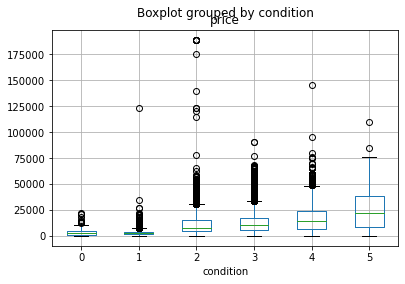

In [46]:
# looking at outliers/abnormals
price_by_condition_boxplot = orgnzd_vehicles.boxplot('price', 'condition')

In [47]:
# seems high as well, lets check prices above 100000
orgnzd_vehicles.query('price > 100000')
# (now after using the boxplot here i know that my decision to check prices over 100000 was correct)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
1309,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-03-02,56,average_milage,high_price
1668,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,other,0,2019-03-20,21,average_milage,high_price
20700,109999,2013,chevrolet corvette,5,8,gas,35,automatic,coupe,white,0,2018-09-07,74,average_milage,high_price
22833,115000,2012,ford f-250 super duty,2,8,diesel,225000,automatic,truck,white,0,2018-12-08,53,high_milage,high_price
24999,140000,2004,ram 2500,2,6,diesel,249000,automatic,truck,red,1,2019-01-22,8,high_milage,high_price
27375,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2018-09-25,72,average_milage,high_price
29810,123456,2000,chevrolet suburban,2,8,gas,123456,manual,truck,silver,0,2018-05-09,40,low_milage,high_price
30634,189000,2014,ford f-150,2,6,gas,102485,automatic,truck,black,0,2018-07-21,42,no group,high_price
33434,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-02-05,102,average_milage,high_price
34206,175000,2004,gmc sierra 2500hd,2,8,diesel,149000,automatic,truck,grey,1,2018-08-25,57,average_milage,high_price


In [48]:
# looking at the max price for "ram 2500" not including 140,000
orgnzd_vehicles.query('model == "ram 2500" and price < 140000')['price'].max()

64917

i see here a couple of things:
* there is another ram 2500 model that is even older that has a price of 140000 which was established not in the range of prices for that model, so its probably 14000
* there are prices like 123456 which are an odd price and probably just somone filling it for the sake of filling and not the real asking price, so its supposed to be null, ill replace it with the median price of the same model, condition etc..
* another thing i notice is that almost all the vehicles with price over 100000 are condition 2, which doesnt make much sense.. ill deal with them later

In [49]:
# so i conclude it was also a typo and will fix it
orgnzd_vehicles.loc[orgnzd_vehicles['price'] == 140000, 'price_p_mdl_an_mdl_yr'] = 'low_price'
orgnzd_vehicles.loc[orgnzd_vehicles['price'] == 140000, 'price'] = 14000
# checking it worked
orgnzd_vehicles.query('price == 140000')  # and model == "ram 2500"

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr


###### now ill deal with the 123456 prices

In [50]:
# looking at the 123456 price rows
orgnzd_vehicles.query('price == 123456')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
29810,123456,2000,chevrolet suburban,2,8,gas,123456,manual,truck,silver,0,2018-05-09,40,low_milage,high_price
36822,123456,2000,chevrolet suburban,2,8,gas,123456,manual,truck,silver,0,2018-12-25,33,no group,high_price
42853,123456,2005,chevrolet suburban,1,8,gas,250000,automatic,suv,silver,1,2019-03-06,21,no group,high_price


1st and 2nd rows looks identical, probably the same owner that posted his vehicle twice on the platform, 1st time he filled the odometer in that way as well, 2nd time i can see by the no group he left the odometer empty, either way, i will leave both of them (and not consider them duplicates) since the date is different (i would think the 3rd is him as well but the transmission is automatic and not manual this time, and the type is suv and not truck, different year model..).

In [51]:
# checking correlation between all numeric columns
orgnzd_vehicles.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.434907,0.227211,0.302948,-0.431828,0.320851,0.000074
model_year,0.434907,1.000000,0.287764,-0.149976,-0.491371,0.038909,-0.004828
condition,0.227211,0.287764,1.000000,-0.066055,-0.300977,0.012856,-0.002404
cylinders,0.302948,-0.149976,-0.066055,1.000000,0.095102,0.407487,0.004229
odometer,-0.431828,-0.491371,-0.300977,0.095102,1.000000,0.034628,0.003142
is_4wd,0.320851,0.038909,0.012856,0.407487,0.034628,1.000000,0.002003
days_listed,0.000074,-0.004828,-0.002404,0.004229,0.003142,0.002003,1.000000


In [52]:
# finding the median price for this model and other variables: (i used model_year between nearby years cause there was only 1 row with 2000)
orgnzd_vehicles.query('model == "chevrolet suburban" and 1999 <= model_year <= 2001 and cylinders == 8 and condition == 2 and price != 123456')['price'].median()

3800.0

In [53]:
# replacing 123456 to 3800 for model 2000
condition1 = orgnzd_vehicles['price'] == 123456
condition2 = orgnzd_vehicles['model_year'] == 2000
orgnzd_vehicles.loc[condition1 & condition2, 'price'] = 3800

In [54]:
# checking that it worked
orgnzd_vehicles.query('model_year == 2000 and price == 123456')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr


In [55]:
# looking at the price for this model and other variables:
orgnzd_vehicles.query('model == "chevrolet suburban" and model_year == 2005 and cylinders == 8 and condition == 1 and type == "suv"')#['price'].median()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
1717,3700,2005,chevrolet suburban,1,8,gas,144000,automatic,suv,black,1,2019-04-09,77,low_milage,low_price
18455,35000,2005,chevrolet suburban,1,8,gas,250000,automatic,suv,custom,1,2018-08-04,53,high_milage,high_price
41710,4000,2005,chevrolet suburban,1,8,gas,218000,automatic,suv,blue,0,2018-12-12,87,average_milage,average_price
42853,123456,2005,chevrolet suburban,1,8,gas,250000,automatic,suv,silver,1,2019-03-06,21,no group,high_price
47610,3650,2005,chevrolet suburban,1,8,gas,206700,automatic,suv,black,1,2019-02-15,73,average_milage,low_price


here i also saw a single 35000 price for model chevrolet suburban year 2005 with 8 cylinders etc.. while others with the same parameters were 4 digit prices so this is also probably a typo and should be 3500

In [56]:
# now ill change the typo
condition1 = orgnzd_vehicles['price'] == 35000
condition2 = orgnzd_vehicles['model_year'] == 2005
condition3 = orgnzd_vehicles['model'] == 'chevrolet suburban'
orgnzd_vehicles.loc[condition1 & condition2 & condition3, 'price_p_mdl_an_mdl_yr'] = 'low_price'
orgnzd_vehicles.loc[condition1 & condition2 & condition3, 'price'] = 3500
# checking it worked
orgnzd_vehicles.query('model == "chevrolet suburban" and model_year == 2005 and cylinders == 8 and condition == 1 and type == "suv"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
1717,3700,2005,chevrolet suburban,1,8,gas,144000,automatic,suv,black,1,2019-04-09,77,low_milage,low_price
18455,3500,2005,chevrolet suburban,1,8,gas,250000,automatic,suv,custom,1,2018-08-04,53,high_milage,low_price
41710,4000,2005,chevrolet suburban,1,8,gas,218000,automatic,suv,blue,0,2018-12-12,87,average_milage,average_price
42853,123456,2005,chevrolet suburban,1,8,gas,250000,automatic,suv,silver,1,2019-03-06,21,no group,high_price
47610,3650,2005,chevrolet suburban,1,8,gas,206700,automatic,suv,black,1,2019-02-15,73,average_milage,low_price


In [57]:
# finding the median price for this model and other variables:
orgnzd_vehicles.query('model == "chevrolet suburban" and model_year == 2005 and cylinders == 8 and condition == 1 and type == "suv" and price != 123456')['price'].median()

3675.0

In [58]:
# replacing 123456 with 3675
condition1 = orgnzd_vehicles['price'] == 123456
orgnzd_vehicles.loc[condition1, 'price'] = 3675

In [59]:
# checking that there are no more 123456 prices
orgnzd_vehicles.query('price == 123456')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr


So now ill check all the values in that have condition 1 or 2 and price is more than 100000 (i am leaving the outlier in condition 4 out of this because i am giving it credit that there can be a way that a price in condition 4 is higher than the highest in condition 5 because of other variables)

In [60]:
# looking at the rows with above 100k price and condition less than 3
orgnzd_vehicles.query('price > 100000 and condition < 3')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
1309,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-03-02,56,average_milage,high_price
1668,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,other,0,2019-03-20,21,average_milage,high_price
22833,115000,2012,ford f-250 super duty,2,8,diesel,225000,automatic,truck,white,0,2018-12-08,53,high_milage,high_price
27375,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2018-09-25,72,average_milage,high_price
30634,189000,2014,ford f-150,2,6,gas,102485,automatic,truck,black,0,2018-07-21,42,no group,high_price
33434,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-02-05,102,average_milage,high_price
34206,175000,2004,gmc sierra 2500hd,2,8,diesel,149000,automatic,truck,grey,1,2018-08-25,57,average_milage,high_price
34389,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-02-02,28,average_milage,high_price
45263,120000,2006,chevrolet silverado 1500,2,8,gas,136000,automatic,truck,blue,1,2018-05-22,27,average_milage,high_price


looks like there are a lot of ford f-150, lets look at them alone

In [61]:
# looking at the rows with above 100k price and condition less than 3 and model ford f-150
orgnzd_vehicles.query('price > 100000 and condition < 3 and model == "ford f-150"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
1309,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-03-02,56,average_milage,high_price
1668,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,other,0,2019-03-20,21,average_milage,high_price
27375,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2018-09-25,72,average_milage,high_price
30634,189000,2014,ford f-150,2,6,gas,102485,automatic,truck,black,0,2018-07-21,42,no group,high_price
33434,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-02-05,102,average_milage,high_price
34389,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-02-02,28,average_milage,high_price


Seems like all the ford f-150 rows are the same (except 1 that had a null color[now we know it is probably black ;) ] and 1 that has different odometer amount) in all columns except date_posted and days_listed, that means that:<br>
1st its not duplicates because of the different dates,<br>
2nd its probably the same owner that re-posted multiple times,<br>
3rd its probably not a typo then, because its not probable that he made the same typo in the price 6 times so the price really is meant to be 189000 (meant by the owner),<br>
4th in row 30634 the odometer is different (lower) then all the other, that row's date is the earliest out of those ford f-150 rows, so it makes sense, the earliest time he posted his vehicle the odometer was lower than all the next times and he hadnt used it since the second time he posted.

now ill look at all the rest:

In [62]:
# looking at the rows with above 100k price and condition less than 3 and model is not ford f-150
orgnzd_vehicles.query('price > 100000 and condition < 3 and model != "ford f-150"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
22833,115000,2012,ford f-250 super duty,2,8,diesel,225000,automatic,truck,white,0,2018-12-08,53,high_milage,high_price
34206,175000,2004,gmc sierra 2500hd,2,8,diesel,149000,automatic,truck,grey,1,2018-08-25,57,average_milage,high_price
45263,120000,2006,chevrolet silverado 1500,2,8,gas,136000,automatic,truck,blue,1,2018-05-22,27,average_milage,high_price


ill start with the highest price here, 175000

In [63]:
# looking at the same "gmc sierra 2500hd" model, with the same variables to see the price range
orgnzd_vehicles.query('model == "gmc sierra 2500hd" and model_year == 2004 and condition == 2 and cylinders == 8 and 100000 < odometer < 200000 and is_4wd == 1')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
3943,6500,2004,gmc sierra 2500hd,2,8,diesel,190653,automatic,truck,white,1,2018-05-08,19,high_milage,low_price
6020,4995,2004,gmc sierra 2500hd,2,8,gas,175000,automatic,truck,green,1,2018-08-24,12,high_milage,low_price
7502,7500,2004,gmc sierra 2500hd,2,8,gas,180000,automatic,pickup,black,1,2018-05-22,18,average_milage,average_price
20706,18900,2004,gmc sierra 2500hd,2,8,diesel,162826,automatic,truck,black,1,2019-02-14,105,high_milage,high_price
34206,175000,2004,gmc sierra 2500hd,2,8,diesel,149000,automatic,truck,grey,1,2018-08-25,57,average_milage,high_price
36054,6200,2004,gmc sierra 2500hd,2,8,diesel,190653,automatic,truck,other,1,2018-11-20,115,high_milage,low_price
42745,4000,2004,gmc sierra 2500hd,2,8,gas,175000,automatic,truck,green,1,2018-12-29,30,high_milage,low_price
44512,25900,2004,gmc sierra 2500hd,2,8,diesel,164987,automatic,truck,black,1,2019-03-17,18,high_milage,high_price
48922,6500,2004,gmc sierra 2500hd,2,8,diesel,190653,automatic,truck,other,1,2018-07-27,46,high_milage,low_price


since its the only one that is 6 digits price out of all the other with exactly the same specs(!) (except odometer which i did a range for) i will consider it a typo and remove one 0 making it 17500

In [64]:
# checking there is only one 175000 in the table
orgnzd_vehicles.query('price == 175000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
34206,175000,2004,gmc sierra 2500hd,2,8,diesel,149000,automatic,truck,grey,1,2018-08-25,57,average_milage,high_price


In [65]:
# replacing 175000 with 17500
condition1 = orgnzd_vehicles['price'] == 175000
orgnzd_vehicles.loc[condition1, 'price'] = 17500
# checking it worked
orgnzd_vehicles.query('price == 175000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr


In [66]:
# looking at the rows with above 100k price and condition less than 3 and model is not ford f-150
orgnzd_vehicles.query('price > 100000 and condition < 3 and model != "ford f-150"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
22833,115000,2012,ford f-250 super duty,2,8,diesel,225000,automatic,truck,white,0,2018-12-08,53,high_milage,high_price
45263,120000,2006,chevrolet silverado 1500,2,8,gas,136000,automatic,truck,blue,1,2018-05-22,27,average_milage,high_price


now the 120000 price

In [67]:
# looking at the same "chevrolet silverado 1500" model, with the same variables to see the price range
orgnzd_vehicles.query('model == "chevrolet silverado 1500" and model_year == 2006 and condition == 2 and cylinders == 8 and 100000 < odometer < 200000 and is_4wd == 1')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
9390,9800,2006,chevrolet silverado 1500,2,8,gas,120650,automatic,truck,white,1,2018-07-15,9,average_milage,average_price
13716,5500,2006,chevrolet silverado 1500,2,8,gas,181000,automatic,pickup,white,1,2018-11-12,26,no group,low_price
20312,6900,2006,chevrolet silverado 1500,2,8,gas,181000,automatic,truck,grey,1,2019-01-01,18,high_milage,low_price
21930,5000,2006,chevrolet silverado 1500,2,8,gas,191000,automatic,pickup,grey,1,2018-06-16,6,high_milage,low_price
24106,10000,2006,chevrolet silverado 1500,2,8,gas,130000,automatic,truck,red,1,2018-06-02,7,average_milage,average_price
25569,10988,2006,chevrolet silverado 1500,2,8,gas,163000,automatic,truck,blue,1,2018-06-06,5,average_milage,average_price
32941,6495,2006,chevrolet silverado 1500,2,8,gas,124000,automatic,truck,custom,1,2018-10-19,74,average_milage,low_price
33457,10988,2006,chevrolet silverado 1500,2,8,gas,163000,automatic,truck,blue,1,2019-01-07,76,average_milage,average_price
35195,10988,2006,chevrolet silverado 1500,2,8,gas,135648,automatic,truck,blue,1,2019-01-12,27,average_milage,average_price
39591,10988,2006,chevrolet silverado 1500,2,8,gas,135648,automatic,truck,blue,1,2018-12-11,18,average_milage,average_price


since its the only one that is 6 digits price out of all the other with exactly the same specs(!) (except odometer which i did a range for) i will consider it a typo and remove one 0 making it 12000

In [68]:
# checking there is only one 120000 in the table
orgnzd_vehicles.query('price == 120000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
45263,120000,2006,chevrolet silverado 1500,2,8,gas,136000,automatic,truck,blue,1,2018-05-22,27,average_milage,high_price


In [69]:
# replacing 120000 with 12000
condition1 = orgnzd_vehicles['price'] == 120000
orgnzd_vehicles.loc[condition1, 'price'] = 12000
# checking it worked
orgnzd_vehicles.query('price == 120000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr


In [70]:
# looking at the rows with above 100k price and condition less than 3 and model is not ford f-150
orgnzd_vehicles.query('price > 100000 and condition < 3 and model != "ford f-150"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
22833,115000,2012,ford f-250 super duty,2,8,diesel,225000,automatic,truck,white,0,2018-12-08,53,high_milage,high_price


now the 115000 price

In [71]:
# looking at the same "ford f-250 super duty" model, with the same variables to see the price range   
orgnzd_vehicles.query('model == "ford f-250 super duty" and model_year == 2012 and 100000 < odometer < 300000 and 0 < condition < 4 and cylinders == 8 ')# and is_4wd == 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
6933,18000,2012,ford f-250 super duty,3,8,diesel,168000,automatic,pickup,white,1,2019-02-23,25,high_milage,average_price
14883,16500,2012,ford f-250 super duty,3,8,gas,112646,automatic,truck,silver,1,2018-10-02,13,average_milage,average_price
19542,20000,2012,ford f-250 super duty,3,8,gas,168000,automatic,truck,other,1,2018-11-24,33,no group,average_price
20202,8500,2012,ford f-250 super duty,2,8,gas,102000,automatic,pickup,white,1,2018-06-10,3,low_milage,low_price
20739,22500,2012,ford f-250 super duty,2,8,diesel,153000,automatic,truck,white,1,2018-05-31,15,average_milage,high_price
22833,115000,2012,ford f-250 super duty,2,8,diesel,225000,automatic,truck,white,0,2018-12-08,53,high_milage,high_price
25999,10500,2012,ford f-250 super duty,3,8,gas,152000,automatic,pickup,black,1,2019-04-02,143,average_milage,low_price
36615,11900,2012,ford f-250 super duty,3,8,gas,173000,automatic,pickup,white,1,2018-06-07,46,high_milage,low_price
44488,13000,2012,ford f-250 super duty,3,8,gas,173000,automatic,pickup,white,1,2019-03-20,23,high_milage,low_price
45546,28000,2012,ford f-250 super duty,2,8,diesel,153000,automatic,truck,custom,1,2018-12-16,39,no group,high_price


Again, since its the only one that is 6 digit price out of all the other with almost exactly the same specs, i will consider it a typo and remove one 0 making it 11500

In [72]:
# checking there is only one 115000 in the table
orgnzd_vehicles.query('price == 115000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
22833,115000,2012,ford f-250 super duty,2,8,diesel,225000,automatic,truck,white,0,2018-12-08,53,high_milage,high_price


In [73]:
# replacing 115000 with 11500
condition1 = orgnzd_vehicles['price'] == 115000
orgnzd_vehicles.loc[condition1, 'price'] = 11500
# checking it worked
orgnzd_vehicles.query('price == 115000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr


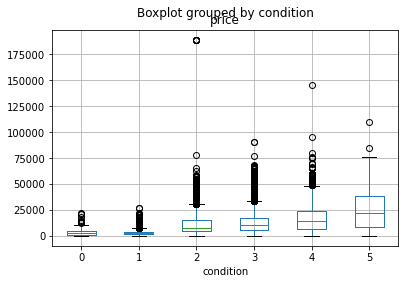

In [74]:
# looking at outliers/abnormals
price_by_condition_boxplot = orgnzd_vehicles.boxplot('price', 'condition')

thats better, the 1 outlier in condition 2 is the 189000 i left because it was logical that it was an intentional price and not a mistake. (and condition 4 is logical to have this price)

In [75]:
# looking at the rows of the min price:
orgnzd_vehicles.query('price == 1').head(50)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
405,1,2014,chevrolet camaro,3,6,gas,71310,automatic,coupe,other,0,2018-07-14,29,average_milage,low_price
3063,1,1998,chevrolet silverado,2,8,gas,164000,automatic,pickup,other,1,2018-10-11,49,average_milage,low_price
3808,1,2007,chevrolet tahoe,2,8,gas,200,automatic,suv,red,0,2019-03-18,63,low_milage,low_price
3902,1,1996,ford f-150,1,8,gas,163000,manual,truck,white,0,2019-02-23,54,average_milage,low_price
4140,1,2004,chevrolet silverado,3,8,diesel,83000,automatic,pickup,other,1,2019-02-04,14,low_milage,low_price
5612,1,2006,gmc sierra,3,8,gas,192960,automatic,truck,white,0,2018-10-29,39,high_milage,low_price
5700,1,2015,ram 2500,3,6,diesel,103549,automatic,truck,red,1,2018-07-31,45,average_milage,low_price
5718,1,2008,toyota tacoma,2,6,gas,168955,automatic,truck,silver,1,2018-12-31,40,average_milage,low_price
5907,1,2011,toyota tacoma,2,6,gas,168955,automatic,truck,other,1,2019-01-03,12,average_milage,low_price
6012,1,2015,ram 2500,3,6,diesel,103549,automatic,truck,red,1,2019-02-17,26,average_milage,low_price


i cant think of a reason why it is 1, other than its a some sort of bidding option.. its too different overall specs, for it to be all a 1,000 or a 10,000 (and that after ignoring the fact that it is pretty hard to forget to type 3 zeros at least..) but the bidding theory is also not perfect, because the days listed are going beyond 100 days and its weird that all those vehicles were removed in the end with that price.. i would report about it to the responsible party and ask them.

i now saw there are other values like 11 so ill check the min price if i filter the table by price > 100:

In [76]:
# looking at the min price when i filter out all prices below 100:
#orgnzd_vehicles.query('100 < price < 1000').head(50) #['price'].min()
orgnzd_vehicles.query('price > 100')['price'].min()

105

In [77]:
# looking at the row of the min price when i filter out all prices below 100:
orgnzd_vehicles.query('price == 105')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
21259,105,2011,chrysler 300,3,6,gas,70000,automatic,sedan,other,0,2018-07-11,100,low_milage,low_price


after checking various chunks of price values (1 - 100, 100 - 1000, etc..) i see that the values of price continue to jump in relatively small jumps (from 2000 to 2005 etc) so my conclusion is even more inclined towards a bidding of sorts..

###### now ill deal with odometer values

In [78]:
# looking at the 123456 odometer rows
orgnzd_vehicles.query('odometer == 123456')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
29810,3800,2000,chevrolet suburban,2,8,gas,123456,manual,truck,silver,0,2018-05-09,40,low_milage,high_price
36822,3800,2000,chevrolet suburban,2,8,gas,123456,manual,truck,silver,0,2018-12-25,33,no group,high_price


In [79]:
# finding the median odometer by this model and other variables:
orgnzd_vehicles.query('model == "chevrolet suburban" and 1999 <= model_year <= 2001 and condition == 2')['odometer'].median()

216000.0

In [80]:
# replacing 123456 with 216000
condition1 = orgnzd_vehicles['odometer'] == 123456
orgnzd_vehicles.loc[condition1, 'odometer'] = 216000

In [81]:
# checking that it worked
orgnzd_vehicles.query('odometer == 123456')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr


In [82]:
# looking at the rows of the min odometer:
orgnzd_vehicles.query('odometer == 0').head(50)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
352,7997,2009,gmc yukon,3,8,gas,0,automatic,suv,white,1,2019-03-16,88,low_milage,low_price
814,2995,1999,ford f-150,2,6,gas,0,manual,truck,other,0,2019-03-14,16,low_milage,average_price
1375,5888,2010,toyota 4runner,2,6,gas,0,automatic,suv,black,0,2019-02-22,36,low_milage,low_price
1461,1000,1992,gmc sierra 1500,2,8,gas,0,automatic,truck,other,0,2018-09-28,47,low_milage,low_price
1970,10988,2000,ford f-250 sd,2,8,diesel,0,automatic,truck,white,1,2018-11-21,39,low_milage,low_price
2049,30000,1969,chevrolet corvette,3,8,other,0,automatic,convertible,white,0,2018-08-01,20,low_milage,low_price
2077,11888,2010,chevrolet silverado 1500,2,8,gas,0,automatic,truck,white,0,2018-07-02,24,low_milage,average_price
2506,3000,2006,honda civic,2,4,gas,0,automatic,sedan,silver,0,2018-06-02,37,low_milage,low_price
3640,4200,2010,nissan murano,2,6,gas,0,automatic,suv,red,1,2018-08-24,21,low_milage,low_price
4186,11888,2010,chevrolet silverado 1500,2,8,gas,0,automatic,truck,white,0,2018-12-06,71,low_milage,average_price


well those vehicles are definetly not new since the owners themselves classify them not as new in condition.
those also cannot be nulls that were filled by 0 cause we had nulls in this column anyway.
maybe the owner just bought it and regrets before driving in it (?) and now wants to sell, but i dont think its customery to do so with vehicles (i have no clue about vehicles) so i am skeptical of this explanation as well.
So i dont have any good explanation for it or a suggestion of what it should have been if at all..
maybe the owner didnt know what odometer is but he did notice it and wanted to fill it and filled 0 just for the sake of it but again its not probable since i assume that people who want to sell their vehicle will know whats what, and if they wont, theyll check it up so.. i dont know what to think of it.

In [83]:
# looking again at the correlations here
orgnzd_vehicles.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.440077,0.230989,0.303896,-0.436936,0.323513,0.000057
model_year,0.440077,1.000000,0.287764,-0.149976,-0.491437,0.038909,-0.004828
condition,0.230989,0.287764,1.000000,-0.066055,-0.301014,0.012856,-0.002404
cylinders,0.303896,-0.149976,-0.066055,1.000000,0.095162,0.407487,0.004229
odometer,-0.436936,-0.491437,-0.301014,0.095162,1.000000,0.034571,0.003136
is_4wd,0.323513,0.038909,0.012856,0.407487,0.034571,1.000000,0.002003
days_listed,0.000057,-0.004828,-0.002404,0.004229,0.003136,0.002003,1.000000


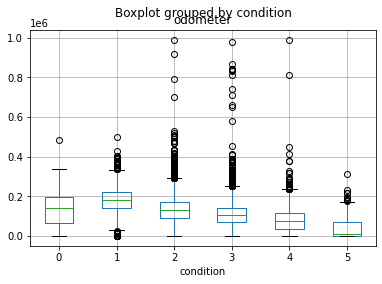

In [84]:
# looking at outliers/abnormal odometer values grouped by condition
odometer_boxplot = orgnzd_vehicles.boxplot('odometer', 'condition')

all the abnormally high odometer values are in conditions 2 - 4 which dont make sense cause the better the condition the lower should be the odometer, and the higher the odometer the worst (lower) the condition.. maybe i should draw the line at 600,000.<br>
i could just make a function that will replace all these values with [value / 10] but it will be too arbitrary in my opinion

based on what i checked on the web it is technically possible to go to 1 million miles in a mechanical odometer but its almost like a miracle if it happens..

i conclude that its illogical that a vehicle that has 4 in condition drove 990,000 miles.. so its probably 99,000

In [85]:
# looking at the rows of the min of days_listed:
orgnzd_vehicles.query('days_listed == 0')#.shape[0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,milag_p_mdl_an_typ_an_cond,price_p_mdl_an_mdl_yr
1247,14995,2008,chevrolet silverado 1500,3,8,gas,93300,automatic,truck,grey,1,2018-05-15,0,average_milage,high_price
1711,59589,2019,chevrolet silverado 2500hd,3,8,diesel,4146,automatic,truck,white,1,2019-01-13,0,no group,high_price
1983,14000,1999,ford f250,3,8,diesel,137500,automatic,truck,red,1,2018-09-27,0,average_milage,high_price
2883,4000,2004,ram 1500,3,8,gas,250000,automatic,truck,brown,1,2018-08-13,0,high_milage,low_price
3965,16750,1985,chevrolet corvette,4,8,gas,24540,automatic,hatchback,white,0,2018-10-14,0,average_milage,high_price
4567,5000,2007,toyota corolla,2,4,gas,223000,manual,sedan,silver,0,2018-07-11,0,high_milage,high_price
4901,12500,2001,ram 1500,2,8,gas,99892,automatic,truck,black,1,2018-05-11,0,average_milage,high_price
6114,500,2003,dodge dakota,1,6,gas,215457,automatic,pickup,other,0,2018-10-31,0,high_milage,low_price
6548,4800,2007,honda odyssey,2,6,gas,152400,automatic,mini-van,brown,0,2018-09-25,0,average_milage,average_price
7036,5900,2007,jeep grand cherokee laredo,3,6,gas,126000,automatic,suv,grey,1,2018-07-21,0,no group,average_price


well there is not much of them, 54, guess its probable that about 0.1% of vehicles got sold in the same day so the system didnt count a day..

### Conclusion

I looked at the data, organized the data (lower cased the object columns..), found the nulls, concluded to fill them with median by groups, made those groups, filled the nulls, checked for duplicates, changed the types of columns to the appropriate type and finaly, dealt with abnormal values.

## Make calculations and add them to the table

In [86]:
final_vehicle = orgnzd_vehicles.copy()

In [87]:
# making columns of the [day of the week, month and year] the ad was placed:
final_vehicle['weekday_posted'] = final_vehicle['date_posted'].dt.weekday
final_vehicle['month_posted'] = pd.DatetimeIndex(final_vehicle['date_posted']).month
final_vehicle['year_posted'] = pd.DatetimeIndex(final_vehicle['date_posted']).year
# making columns of the vehicle_age and vehicle's average mileage per year
final_vehicle['vehicle_age'] = final_vehicle['year_posted'] - final_vehicle['model_year']
# making age 0 to 1
final_vehicle.loc[final_vehicle['vehicle_age'] == 0] = 1
# ..and rounding    # and replacing the infinite values (that we got from dividing by 0) with nan
final_vehicle['avg_milag_p_yr'] = (final_vehicle['odometer'] / final_vehicle['vehicle_age']).round()#.replace(np.inf, np.nan)
# checking all the inf values were removed
#final_vehicle[np.isinf(final_vehicle['avg_milag_p_yr'])]['avg_milag_p_yr'].sum()
final_vehicle['avg_milag_p_yr'].isna().sum()

0

In [88]:
# ill fill the nulls with odometer
#final_vehicle['avg_milag_p_yr'] = final_vehicle['avg_milag_p_yr'].fillna(final_vehicle['odometer'])
# replacing 0 values with the value in odometer
#for row in final_vehicle:
    #row[row['avg_milag_p_yr'] == 0, 'avg_milag_p_yr'] = row['odometer']
    #row['avg_milag_p_yr'].replace(0, row['odometer'], inplace = True)
#final_vehicle[final_vehicle['avg_milag_p_yr'] == 0, 'avg_milag_p_yr'] = final_vehicle['odometer']
#final_vehicle['avg_milag_p_yr'].replace(0, final_vehicle['odometer'], inplace = True)
# changing the avg_milag_p_yr column to int
final_vehicle['avg_milag_p_yr'] = final_vehicle['avg_milag_p_yr'].astype('int64')
final_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   price                       51525 non-null  int64 
 1   model_year                  51525 non-null  int64 
 2   model                       51525 non-null  object
 3   condition                   51525 non-null  int64 
 4   cylinders                   51525 non-null  int64 
 5   fuel                        51525 non-null  object
 6   odometer                    51525 non-null  int64 
 7   transmission                51525 non-null  object
 8   type                        51525 non-null  object
 9   paint_color                 51525 non-null  object
 10  is_4wd                      51525 non-null  int64 
 11  date_posted                 51525 non-null  object
 12  days_listed                 51525 non-null  int64 
 13  milag_p_mdl_an_typ_an_cond  51525 non-null  ob

### Conclusion

I made columns for the day of the week, month and year the ad was placed, and vehicle's age and vehicle's average mileage per year. then i dealt with inf and nan values and converted the last float column to int.

## 4 Carry out exploratory data analysis

In [89]:
# importing matplot library
import matplotlib.pyplot as plt

In [90]:
# looking at the descriptive statistics of the final table
final_vehicle.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_milag_p_yr
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,11044.239107,1924.010112,2.549888,5.898574,114648.068394,0.512470,37.954275,2.916836,6.355323,1932.531101,8.563513,16934.462513
std,9082.361212,405.303026,0.760469,1.923070,65110.094004,0.499849,28.688606,1.994474,3.590563,407.056050,6.118745,12712.156414
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,4695.000000,2006.000000,2.000000,4.000000,71144.000000,0.000000,17.000000,1.000000,3.000000,2018.000000,4.000000,10187.000000
50%,8500.000000,2010.000000,3.000000,6.000000,113412.000000,1.000000,32.000000,3.000000,6.000000,2018.000000,7.000000,14667.000000
75%,15450.000000,2014.000000,3.000000,8.000000,154110.000000,1.000000,52.000000,5.000000,10.000000,2019.000000,12.000000,20666.000000
max,189000.000000,2018.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,110.000000,279365.000000


##### task 1
Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.

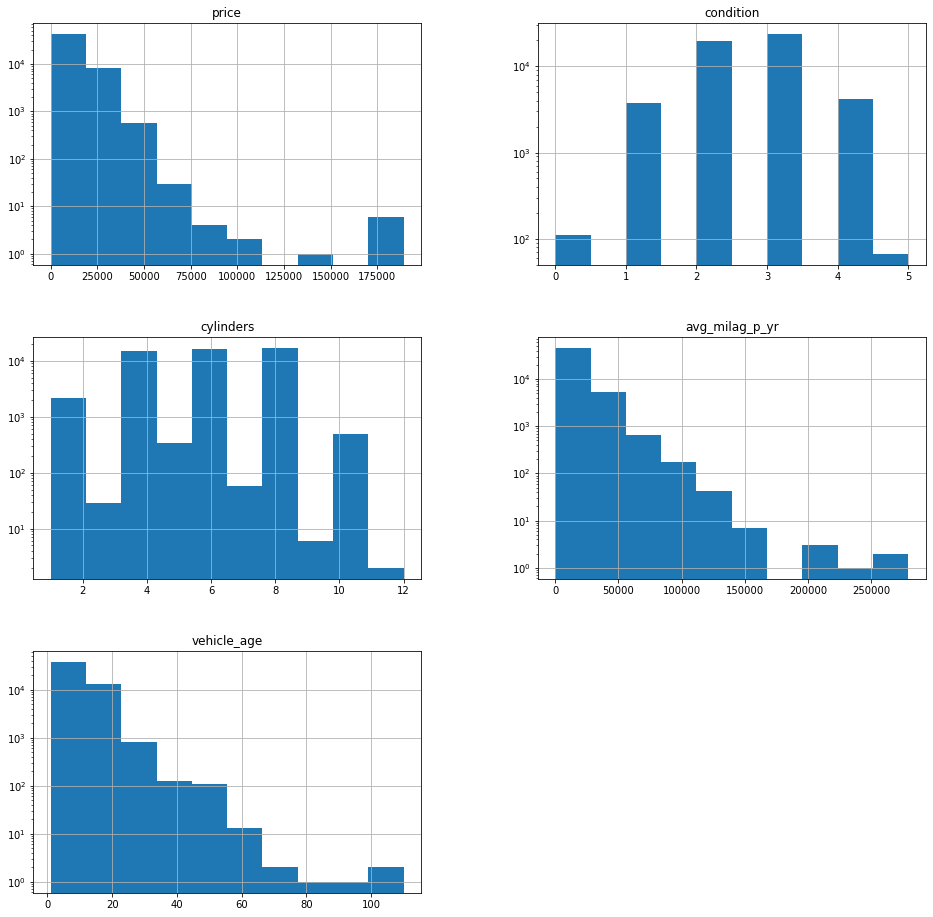

In [91]:
# ploting histograms of the tasked columns                                 #'odometer'    'date_posted'
final_vehicle.hist(log = True, column = ['price', 'condition', 'cylinders', 'avg_milag_p_yr', 'vehicle_age'], figsize = (16, 16))
plt.show()

##### task 2
Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

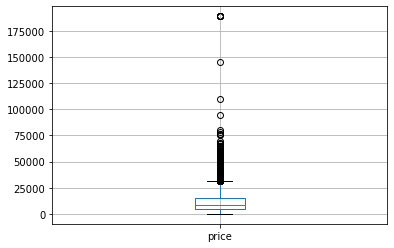

In [92]:
# looking at the outliers for price using boxplot
price_boxplot = final_vehicle.boxplot('price')

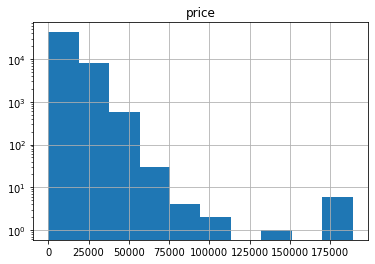

In [93]:
# looking at the outliers for price using hist
price_hist = final_vehicle.hist('price', log=True)

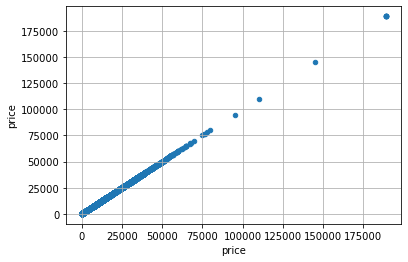

In [94]:
# looking at the outliers for price using scatter
price_scatter = final_vehicle.plot.scatter(x='price', y='price', grid = True)
#final_vehicle.plot(x='price', y='price', kind='scatter')

lets say all the price values above <s>70000</s> `100000` are outliers

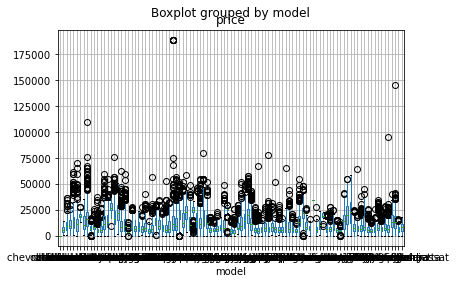

In [102]:
# looking at the outliers for price per model using boxplot
price_boxplot = final_vehicle.boxplot('price', 'model')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

(if there is a way to do what i am doing next with the way above and not with apply tell me because apply is really slow)

In [ ]:
# making a function to calculate the upper range of price per model
def upper_price(row):
    price = row['price']
    model = row['model']
    #model_year = row['model_year']
    table = final_vehicle.query('model == @model') #  and model_year == @model_year
    price_range = table['price']
    try:
        sorted(price_range)
        Q1,Q3 = np.percentile(price_range , [25,75])
        IQR = Q3 - Q1
        #lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        return upper_range
    except:
        return 'fail'

In [ ]:
# applying the function to the table and adding the results to a new column called "upper_price_p_mdl" which means: upper price per model
final_vehicle['upper_price_p_mdl'] = final_vehicle.apply(upper_price, axis = 1)

In [ ]:
# making a df for price outliers
price_outliers = final_vehicle.query('price > upper_price_p_mdl')

to not skew the outlier data i wont remove the outliers rows yet, and will remove them after ill determine all the outliers in the relevant columns

In [ ]:
# determinating the outliers for condition
final_vehicle.boxplot('condition')

i dont consider 5 as upper outlier just because there are much less numbers of vehicles that are in the best condition.

In [ ]:
# determinating the outliers for cylinders
final_vehicle.boxplot('cylinders')

no outliers in cylinders column.

In [ ]:
# looking at the outliers for avg_milag_p_yr using boxplot
final_vehicle.boxplot('avg_milag_p_yr')

In [ ]:
# looking at the outliers for avg_milag_p_yr using scatter       
final_vehicle.plot.scatter(x='avg_milag_p_yr', y='avg_milag_p_yr', grid = True)

(lets say all the avg_milag_p_yr values above `200000` are outliers [this cant be btw, because again; when i checked online it said: <br>
"Q: How much mileage per year should a car have? <br>
A: As a general rule, you should assume that the average car owner puts **12,000** miles on a car each year. To determine whether a car has reasonable mileage, you can simply multiply 12,000 by its age. That means good mileage for a car that's 5 years old is 60,000." <br>
but! in this graph we see that 12000 is nowhere near the avarage.. and the outliers begin at minimum 130000, so..  <br>
hope you understood that something isnt adding up here..])

In [ ]:
# looking again at the correlations here
final_vehicle.corr()

In [ ]:
# looking at the outliers for avg_milag_p_yr per model using scatter
final_vehicle.plot.scatter(x='avg_milag_p_yr', y='model', grid = True, figsize = (15, 15))

In [ ]:
# making a function to calculate the upper range of avg_milag_p_yr per model # model_year
def upper_avg_milag(row):
    avg_milag_p_yr = row['avg_milag_p_yr']
    model = row['model']
    #model_year = row['model_year']
    table = final_vehicle.query('model == @model')
    avg_milag_p_yr_range = table['avg_milag_p_yr']
    try:
        sorted(avg_milag_p_yr_range)
        Q1,Q3 = np.percentile(avg_milag_p_yr_range , [25,75])
        IQR = Q3 - Q1
        #lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        return upper_range
    except:
        return 'fail'

In [ ]:
# applying the function to the table and adding the results to a new column called "upper_avg_milag_p_yr_p_mdl_yr" which means: upper avg_milag_p_yr per model year
final_vehicle['upper_avg_milag_p_mdl'] = final_vehicle.apply(upper_avg_milag, axis = 1)

In [ ]:
# making a df for odometer outliers
avg_milag_p_yr_outliers = final_vehicle.query('avg_milag_p_yr > upper_avg_milag_p_mdl')

no outliers in date_posted column.

In [ ]:
# looking at the outliers for vehicle_age using boxplot
final_vehicle.boxplot('vehicle_age')

In [ ]:
# looking at the outliers for vehicle_age using scatter
final_vehicle.plot.scatter(x='vehicle_age', y='vehicle_age', grid = True)

lets say all the vehicle_age values above `80` are outliers

In [ ]:
# making a function to calculate the upper range of vehicle_age
def upper_vehicle_age(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    #lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return upper_range

In [ ]:
# saving the extreme/upper age to a variable
uppers_vehicles_age = upper_vehicle_age(final_vehicle.vehicle_age)

In [ ]:
# making a df for vehicle_age outliers
vehicle_age_outliers = final_vehicle.query('vehicle_age > @uppers_vehicles_age')

In [ ]:
no_outliers_vehicle = final_vehicle.copy()

In [ ]:
# making a df with no outliers
no_outliers_vehicle.drop(no_outliers_vehicle.query('price > upper_price_p_mdl or avg_milag_p_yr > upper_avg_milag_p_mdl or vehicle_age > @uppers_vehicles_age').index, inplace=True)

In [ ]:
# reseting index
no_outliers_vehicle.reset_index(inplace = True, drop = True)

now ill make 1 outlier df out of all the outlier tables

In [ ]:
# combining the 3 tables into 1 outlier df
vehicle_outliers = vehicle_age_outliers.append([price_outliers, avg_milag_p_yr_outliers], ignore_index = True)

In [ ]:
# looking at the df info for nulls and row number
vehicle_outliers.info()

In [ ]:
# checking i got all the rows from the 3 tables
vehicle_age_outliers.shape[0] + price_outliers.shape[0] + avg_milag_p_yr_outliers.shape[0]

now ill check for duplicate rows because there probably will be rows that were outliers in a couple of columns

In [ ]:
# checking for duplicates not including the columns i made myself like "upper_price_p_mdl" and "upper_odometer_p_mdl_yr" etc'
relevant_columns = ['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type', 'paint_color', 'is_4wd', 'date_posted', 'days_listed', 'vehicle_age']
vehicle_outliers.duplicated(subset = relevant_columns).sum()

In [ ]:
# removing duplicates based on the relevant columns
vehicle_outliers.drop_duplicates(subset = relevant_columns, inplace = True, ignore_index = True)
vehicle_outliers.duplicated(subset = relevant_columns).sum()

##### task 3
Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.

(tried really hard to make the histograms overlap but it wouldnt work, even with help from instructors)

In [ ]:
# ploting histograms of the tasked columns
#print('including outliers')
final_vehicle.hist(log = True, column = ['price', 'avg_milag_p_yr', 'vehicle_age'], figsize = (14, 8), alpha = 0.5)
#print('not including outliers')
no_outliers_vehicle.hist(log = True, column = ['price', 'avg_milag_p_yr', 'vehicle_age'], figsize = (14, 8), alpha = 0.5)
plt.show()

###### conclusion
There is no outliers in condition and cylinders <br>
`price` - the histogram without outliers is ending at about 65000 instead of 189000 so i conclude that the diference are outliers (?) and  **most** of the vehicles are priced up to 40000 (truthfully i am not sure what are my conclusions here except stating the obvious)<br>
`avg_milag_p_yr` - the most common value without outliers is somewhere between 12k - 18k<br>
`vehicles age` - **most** vehicles are aged up to 15 and not up to 30 as it would seem with the outliers <br>
(i actually would appreciate you nudging me in the right direction here cause i am not feeling like its strong conclusions)

##### task 4
Study how many days advertisements were displayed (`days_listed`). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [ ]:
# Studying how many days advertisements were displayed
no_outliers_vehicle['days_listed'].describe()

seems on avarage the ads were displayed 39 days. (dont know what else there is to say here)

In [ ]:
# plotting a histogram
no_outliers_vehicle['days_listed'].hist(bins = 43)

In [ ]:
# calculating the mean and median of days_listed
mean_days = no_outliers_vehicle['days_listed'].mean()
median_days = no_outliers_vehicle['days_listed'].median()

###### Describing the typical lifetime of an ad
the typical lifetime is about 6 to 55 days <br>
or maybe its Q1 and Q3; 19 to 53

###### Determining when ads were removed quickly, and when they were listed for an abnormally long time
if the ad was removed after 5 days or less it was too quick, if it was <s>56</s> 105 or more it was a long time

##### task 5
Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

In [ ]:
# number of ads and average price for each type of vehicle
vehicle_p_type = no_outliers_vehicle.pivot_table(index = 'type', values = 'price', aggfunc = ['mean', 'count']).reset_index()
vehicle_p_type.sort_values(('count', 'price'), inplace = True, ignore_index = True)
vehicle_p_type.columns = ['type', 'mean_price', 'count']
vehicle_p_type

In [ ]:
# Plotting a graph showing the dependence of the number of ads on the vehicle type.
vehicle_p_type.plot.scatter(x = 'type', y = 'count', figsize = (12, 6))

###### Selecting the two types with the greatest number of ads
sedan and suv (but why i needed a graph for it or at all?)

##### task 6
What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

In [ ]:
# droping not relevant columns for this task
not_relevant_columns = ['model_year', 'model', 'cylinders', 'fuel',
                    'is_4wd', 'date_posted', 'days_listed', 'milag_p_mdl_an_typ_an_cond',
                    'price_p_mdl_an_mdl_yr', 'weekday_posted', 'month_posted', 'year_posted', 'odometer',  #'avg_milag_p_yr'
                    'upper_price_p_mdl', 'upper_avg_milag_p_mdl']      # 'upper_odometer_p_mdl_yr'
task6_table = no_outliers_vehicle.drop(not_relevant_columns, axis = 1)
task6_table

so if i understand correctly the wording in the task, i should only study the data for the 2 types from task 5; sedan and suv

In [ ]:
# filtering for only the needed types
task6_table = task6_table.query('type == "sedan" or type == "suv"').reset_index(drop = True)
task6_table

In [ ]:
# making a sedan and suv filtered tables
sedan = task6_table.query('type == "sedan"').reset_index(drop = True)
suv = task6_table.query('type == "suv"').reset_index(drop = True)

In [ ]:
# making pivot tables by the numeric tasked columns for sedan
sedan_by_vehicle_age = sedan.pivot_table(index = 'vehicle_age', values = 'price', aggfunc = ['median', 'count']).reset_index()
sedan_by_avg_milag_p_yr = sedan.pivot_table(index = 'avg_milag_p_yr', values = 'price', aggfunc = ['median', 'count']).reset_index()
sedan_by_condition = sedan.pivot_table(index = 'condition', values = 'price', aggfunc = ['median', 'count']).reset_index()
#sedan_by_transmission = task6_table.query('type == "sedan"')#.pivot_table(index = 'transmission', values = 'price', aggfunc = ['mean', 'count']).reset_index()
#sedan_by_paint_color = task6_table.query('type == "sedan"')#.pivot_table(index = 'paint_color', values = 'price', aggfunc = ['mean', 'count']).reset_index()

In [ ]:
# making pivot tables by the numeric tasked columns for suv
suv_by_vehicle_age = suv.pivot_table(index = 'vehicle_age', values = 'price', aggfunc = ['median', 'count']).reset_index()
suv_by_avg_milag_p_yr = suv.pivot_table(index = 'avg_milag_p_yr', values = 'price', aggfunc = ['median', 'count']).reset_index()
suv_by_condition = suv.pivot_table(index = 'condition', values = 'price', aggfunc = ['median', 'count']).reset_index()
#suv_by_transmission = task6_table.query('type == "suv"')#.pivot_table(index = 'transmission', values = 'price', aggfunc = ['mean', 'count']).reset_index()
#suv_by_paint_color = task6_table.query('type == "suv"')#.pivot_table(index = 'paint_color', values = 'price', aggfunc = ['mean', 'count']).reset_index()

now ill make scatterplots for the relevant tables; sedan_by_vehicle_age, sedan_by_avg_milag_p_yr, sedan_by_condition, suv_by_vehicle_age, suv_by_avg_milag_p_yr, suv_by_condition

In [ ]:
# plotting scatterplot for sedan_by_vehicle_age
sedan_by_vehicle_age.plot.scatter(x = 'vehicle_age', y = 'median', grid = True)

vehicles age seems nice and consistent and logical, the older the car is, the lower price it is.

In [ ]:
# plotting scatterplot for sedan_by_avg_milag_p_yr
sedan_by_avg_milag_p_yr.plot.scatter(x = 'avg_milag_p_yr', y = 'median', grid = True)

seems avg_milag barely impacts price,the values are all over the place without any correlation i could notice (which again, in my eyes is another hint that the odometer is what was meant in the task of the project)

In [ ]:
# plotting scatterplot for sedan_by_condition
sedan_by_condition.plot.scatter(x = 'condition', y = 'median', grid = True)

it seems there are a lot of low "bidding prices for a 1 condition.

In [ ]:
# plotting scatterplot for suv_by_vehicle_age
suv_by_vehicle_age.plot.scatter(x = 'vehicle_age', y = 'median', grid = True)

again, vehicles age seems nice and consistent and logical, the older the car is, the lower price it is.

In [ ]:
# plotting scatterplot for suv_by_avg_milag_p_yr
suv_by_avg_milag_p_yr.plot.scatter(x = 'avg_milag_p_yr', y = 'median', grid = True)

again, seems avg_milag barely impacts the price,the values are all over the place without any correlation i could notice (which again, in my eyes is another hint that the odometer is what was meant in the task of the project)

In [ ]:
# plotting scatterplot for suv_by_condition
suv_by_condition.plot.scatter(x = 'condition', y = 'median', grid = True)

seems condition is somewhat inconsistent in affecting the price, or there are just a lot of low "bidding prices for a 5 condition.

now ill make box-and-whisker charts for the tables: sedan_by_transmission, sedan_by_paint_color, suv_by_transmission, suv_by_paint_color

In [ ]:
# making pivot tables by the categorical tasked columns for sedan and suv and counting each category
sedan_by_transmission_count = sedan.pivot_table(index = 'transmission', values = 'price', aggfunc = ['count', 'median']).reset_index() #1
sedan_by_color_count = sedan.pivot_table(index = 'paint_color', values = 'price', aggfunc = ['count', 'median']).reset_index() #1
suv_by_transmission_count = suv.pivot_table(index = 'transmission', values = 'price', aggfunc = ['count', 'median']).reset_index() #1
suv_by_color_count = suv.pivot_table(index = 'paint_color', values = 'price', aggfunc = ['count', 'median']).reset_index() #1

# renaming the columns
sedan_by_transmission_count.columns = ['transmission', 'count', 'median'] #2
sedan_by_color_count.columns = ['paint_color', 'count', 'median'] #2
suv_by_transmission_count.columns = ['transmission', 'count', 'median'] #2
suv_by_color_count.columns = ['paint_color', 'count', 'median'] #2

# sorting the tables by median
sedan_by_transmission_count.sort_values('median', ascending = False, inplace = True)
sedan_by_color_count.sort_values('median', ascending = False, inplace = True)
suv_by_transmission_count.sort_values('median', ascending = False, inplace = True)
suv_by_color_count.sort_values('median', ascending = False, inplace = True)

# removing rows (types and colors) with less then 50 count (ads) in the designated tables
sedan_trnsmsn_above50 = sedan_by_transmission_count.query('count >= 50') #3
sedan_color_above50 = sedan_by_color_count.query('count >= 50') #3
suv_trnsmsn_above50 = suv_by_transmission_count.query('count >= 50') #3
suv_color_above50 = suv_by_color_count.query('count >= 50') #3

# creating new tables with only the categories above 50 counts
sedan_transmission_final = sedan.query('transmission in @sedan_trnsmsn_above50.transmission') #4
sedan_color_final = sedan.query('paint_color in @sedan_color_above50.paint_color') #4
suv_transmission_final = suv.query('transmission in @suv_trnsmsn_above50.transmission') #4
suv_color_final = suv.query('paint_color in @suv_color_above50.paint_color') #4

In [ ]:
import seaborn as sns
sedan_medians = sedan_color_final.groupby('paint_color')['price'].median().sort_values(ascending=False)
suv_medians = suv_color_final.groupby('paint_color')['price'].median().sort_values(ascending=False)

In [ ]:
# boxplotting the final sedan by transmission table price values grouped by transmission
#sedan_transmission_final.boxplot('price', 'transmission')
sns.boxplot(x = 'transmission', y = 'price', data = sedan_transmission_final, showmeans = True, meanline = True)
sedan_transmission_final['transmission'].value_counts()

seems to be very little "other" transmission types (which can indicate that its a mistake in the data and it supposed to be either automatic or manual) <br> 
so i checked on the web, and there really are other transmission types (
* Automatic Transmission (AT)
* Manual Transmission (MT)
* Automated Manual Transmission (AMT)
* Continuously Variable Transmission (CVT) <br>
) so i have to assume its not a mistake. Seems that sedans are more expensive when they are automatic and thats even though there are 20 times more of them then manuals.

In [ ]:
# boxplotting the final sedan by color table price values grouped by paint_color
plt.figure(figsize = (7, 5), dpi = 80)
sns.boxplot(x = 'paint_color', y = 'price', data = sedan_color_final, showmeans = True, meanline = True, order = sedan_medians.iloc[::1].index) # , {meanprops: line}

black and white sedans seems to be more expensive than the rest of the colors. the green and brown sedan worth the least money.

In [ ]:
# boxplotting the final suv by transmission table price values grouped by transmission
sns.boxplot(x = 'transmission', y = 'price', data = suv_transmission_final, showmeans = True, meanline = True)

Seems like suv drivers really appreciate manual model, and prefer it above the rest.

In [ ]:
# boxplotting the final suv by paint_color table price values grouped by paint_color
#suv_color_final.boxplot('price', 'paint_color', figsize = (15, 4))
plt.figure(figsize = (7, 5), dpi = 80)
sns.boxplot(x = 'paint_color', y = 'price', data = suv_color_final, showmeans = True, meanline = True, order = suv_medians.iloc[::1].index)

Orange suv seems to be much more in demand than the rest of the colors and green is least wanted in suv's as well as in sedans.

## Overall conclusion

1 **Preprocessing** - originally i had data of vehicle listings with all sorts of parameters like model, model year, price, milage etc'. the data had problems in form of missing values, errors but no duplicates at least. first i organized the table by lower casing all the relevant object columns and rounded relevant number columns. <br>
then i filled the missing values in is_4wd (which is a True/False column) with 0 because all the other values were 1 and about 50% of the column. then i filled the nulls in paint_color with "other" sense i have no way of determining which color it was and it doesnt really matter. then i replaced condition values to numbers and did a correlation table to get an idea what columns affect the most on the values in the columns that have nulls and later filled them by making groups for odometer and price to hen group by those groups to find the best approximations of the nulls. then converted all the floats to integers and the date to datetime. then i checked for duplicates, dealed with abnormal values like price is 123456 or very high prices compared to other vehicles (of the same model and condition etc) and others. and in the end i got a table of 51525 rows with no NaN and no duplicates.<br>

2 **Adding tasked calculations to the table** - added the:
* Day of the week, month, and year the ad was placed,
* The vehicle's age (in years) when the ad was placed
* The vehicle's average mileage per year

3 **Carrying out EDA, and following the instructions** - 
i looked at the histograms of the tasked columns to see more info about the outliers whereabouts.
found the "extreme points of each column that had outliers, and filtered out the outliers beyond them to a outlier table as tasked. then i made new histograms for the same tasked columns with the filtered data and compared them to the previous histograms and made conclusions. then i studied days listed and selected the 2 types with the most ads posted. lastly, i checked which of the tasked columns impact price the most - vehicles age.

# Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn